In [43]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [44]:
df = pd.read_csv('creditcard.csv')

In [45]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [46]:
#peek at data
df.sample(5)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
250186  154773.0 -0.513  1.062  0.566  0.302  0.043 -0.357 -0.105  0.426   
12251    21405.0  0.879  0.002 -0.095  1.264  0.544  0.706  0.169  0.194   
195454  131062.0  2.064 -0.971  0.070 -0.343 -1.407 -0.375 -1.159 -0.068   
228342  145472.0  2.063  0.010 -1.044  0.410 -0.076 -1.200  0.239 -0.381   
51699    45081.0 -0.717  1.570  0.770 -0.261  0.460 -0.513  0.763 -0.075   

           V9  ...    V21    V22    V23    V24    V25    V26    V27    V28  \
250186 -0.086  ...  0.417  1.314 -0.139  1.074 -0.499 -0.099  0.152  0.160   
12251   1.160  ...  0.038  0.273 -0.036 -0.708  0.389 -0.233  0.010  0.007   
195454  0.130  ... -0.338 -0.331  0.364 -0.096 -0.659  0.464  0.016 -0.029   
228342  0.419  ... -0.280 -0.631  0.332  0.068 -0.272  0.193 -0.065 -0.058   
51699  -0.162  ... -0.363 -0.775 -0.117 -0.491  0.098  0.129  0.464  0.213   

        Amount  Class  
250186    2.49      0  
12251    99.99      0  
195454   27.44      0  
228342    1.29      0  
51699     1.29      0  

[5 rows x 31 columns]

In [47]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [48]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

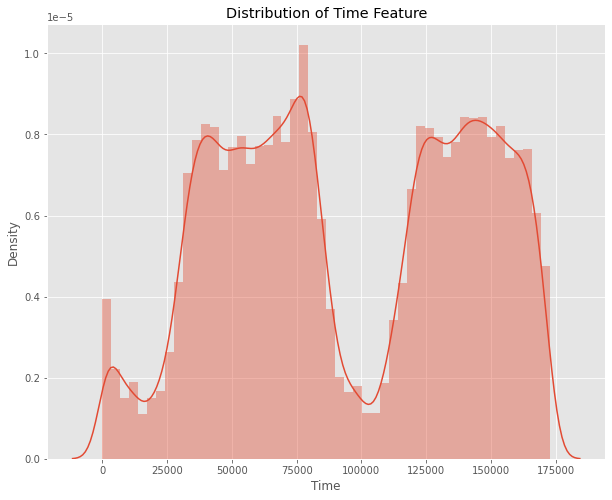

In [49]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

<AxesSubplot:title={'center':'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

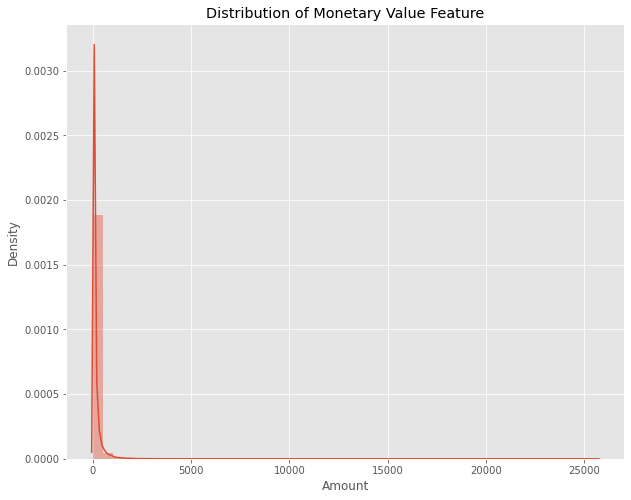

In [50]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [51]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

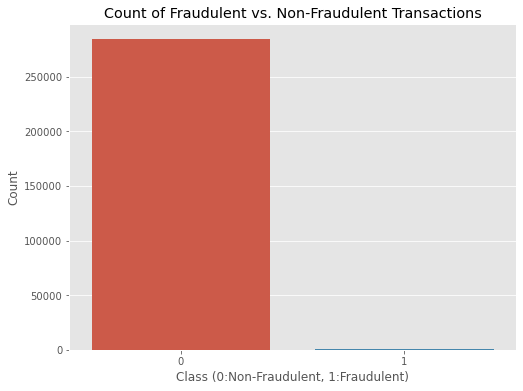

In [52]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [53]:
corr = df.corr()
corr

Time         V1         V2         V3         V4         V5  \
Time    1.000  1.174e-01 -1.059e-02 -4.196e-01 -1.053e-01  1.731e-01   
V1      0.117  1.000e+00  4.136e-16 -1.228e-15 -9.215e-16  1.813e-17   
V2     -0.011  4.136e-16  1.000e+00  3.244e-16 -1.121e-15  5.158e-16   
V3     -0.420 -1.228e-15  3.244e-16  1.000e+00  4.711e-16 -6.539e-17   
V4     -0.105 -9.215e-16 -1.121e-15  4.711e-16  1.000e+00 -1.720e-15   
V5      0.173  1.813e-17  5.158e-16 -6.539e-17 -1.720e-15  1.000e+00   
V6     -0.063 -6.507e-16  2.787e-16  1.628e-15 -7.492e-16  2.408e-16   
V7      0.085 -1.005e-15  2.056e-16  4.895e-16 -4.105e-16  2.716e-16   
V8     -0.037 -2.434e-16 -5.377e-17 -1.269e-15  5.697e-16  7.437e-16   
V9     -0.009 -1.514e-16  1.978e-17  5.568e-16  6.923e-16  7.392e-16   
V10     0.031  7.388e-17 -3.991e-16  1.157e-15  2.233e-16 -5.202e-16   
V11    -0.248  2.125e-16  1.975e-16  1.577e-15  3.459e-16  7.204e-16   
V12     0.124  2.053e-16 -9.569e-17  6.310e-16 -5.626e-16  7.413e-16   
V13    -0.066 -2.426e-17  6.295e-16  2.808e-16  1.303e-16  5.887e-16   
V14    -0.099 -5.020e-16 -1.731e-16  4.740e-16  2.282e-16  6.565e-16   
V15    -0.183  3.548e-16 -4.996e-17  9.069e-16  1.378e-16 -8.720e-16   
V16     0.012  7.213e-17  1.177e-17  8.299e-16 -9.615e-16  2.246e-15   
V17    -0.073 -3.880e-16 -2.685e-16  7.615e-16 -2.700e-16  1.282e-16   
V18     0.090  3.230e-17  3.285e-16  1.510e-16 -5.104e-16  5.309e-16   
V19     0.029  1.502e-16 -7.119e-18  3.464e-16 -3.981e-16 -1.450e-16   
V20    -0.051  4.655e-16  2.507e-16 -9.316e-16 -1.857e-16 -3.554e-16   
V21     0.045 -2.457e-16 -8.480e-17  5.706e-17 -1.950e-16 -3.921e-16   
V22     0.144 -4.291e-16  1.526e-16 -1.134e-15 -6.276e-17  1.254e-16   
V23     0.051  6.169e-16  1.634e-16 -4.983e-16  9.164e-17 -8.429e-18   
V24    -0.016 -4.425e-17  1.248e-17  2.687e-19  1.585e-16 -1.149e-15   
V25    -0.233 -9.606e-16 -4.479e-16 -1.105e-15  6.071e-16  4.809e-16   
V26    -0.041 -1.581e-17  2.057e-16 -1.238e-16 -4.247e-16  4.320e-16   
V27    -0.005  1.198e-16 -4.967e-16  1.046e-15  3.977e-17  6.590e-16   
V28    -0.009  2.083e-15 -5.094e-16  9.776e-16 -2.761e-18 -5.614e-18   
Amount -0.011 -2.277e-01 -5.314e-01 -2.109e-01  9.873e-02 -3.864e-01   
Class  -0.012 -1.013e-01  9.129e-02 -1.930e-01  1.334e-01 -9.497e-02   

               V6         V7         V8         V9  ...        V21        V22  \
Time   -6.302e-02  8.471e-02 -3.695e-02 -8.660e-03  ...  4.474e-02  1.441e-01   
V1     -6.507e-16 -1.005e-15 -2.434e-16 -1.514e-16  ... -2.457e-16 -4.291e-16   
V2      2.787e-16  2.056e-16 -5.377e-17  1.978e-17  ... -8.480e-17  1.526e-16   
V3      1.628e-15  4.895e-16 -1.269e-15  5.568e-16  ...  5.706e-17 -1.134e-15   
V4     -7.492e-16 -4.105e-16  5.697e-16  6.923e-16  ... -1.950e-16 -6.276e-17   
V5      2.408e-16  2.716e-16  7.437e-16  7.392e-16  ... -3.921e-16  1.254e-16   
V6      1.000e+00  1.192e-16 -1.104e-16  4.131e-16  ...  5.833e-17 -4.705e-19   
V7      1.192e-16  1.000e+00  3.344e-16  1.123e-15  ... -2.028e-16 -8.899e-16   
V8     -1.104e-16  3.344e-16  1.000e+00  4.356e-16  ...  3.893e-16  2.027e-16   
V9      4.131e-16  1.123e-15  4.356e-16  1.000e+00  ...  1.937e-16 -7.072e-16   
V10     5.932e-17 -7.493e-17 -2.801e-16 -4.642e-16  ...  1.178e-15 -6.418e-16   
V11     1.981e-15  1.425e-16  2.487e-16  1.355e-16  ... -5.658e-16  7.773e-16   
V12     2.375e-16 -3.537e-18  1.840e-16 -1.079e-15  ...  7.301e-16  1.645e-16   
V13    -1.211e-16  1.266e-17 -2.922e-16  2.251e-15  ...  1.008e-16  6.748e-17   
V14     2.621e-16  2.608e-16 -8.599e-16  3.785e-15  ... -3.357e-16  3.740e-16   
V15    -1.531e-15 -1.691e-16  4.128e-16 -1.051e-15  ...  6.605e-17 -4.209e-16   
V16     2.624e-18  5.869e-17 -5.255e-16 -1.214e-15  ... -4.715e-16 -7.923e-17   
V17     2.016e-16  2.177e-16 -2.270e-16  1.114e-15  ... -8.231e-16 -8.743e-16   
V18     1.224e-16  7.604e-17 -3.668e-16  4.993e-16  ... -9.409e-16 -4.819e-16   
V19    -1.866e-16 -1.881e-16 -3.875e-16 -1.376e-16  ...  5.116e-16 -1.164e-15   
V20

Text(0.5, 1.0, 'Heatmap of Correlation')

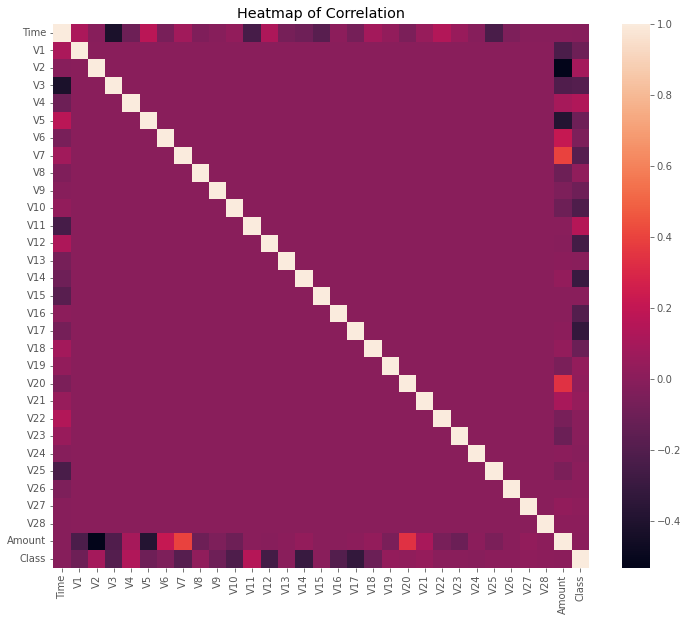

In [54]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [55]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

**Scaling Amount and Time**

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [57]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [58]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
65545    51637.0 -1.120  0.113  0.913  0.083  1.283  0.690  0.089  0.513   
207829  136849.0  1.721 -0.045 -2.425  0.562  1.466  1.092  0.068  0.309   
145679   87124.0 -0.387  0.342 -1.038 -0.067  3.938  3.462  0.783  0.582   
31147    36232.0  1.136 -0.025  0.297  0.393 -0.325 -0.457  0.008 -0.074   
202715  134456.0 -0.943  0.251 -0.414 -0.921 -0.341 -1.054  0.319  0.153   

           V9  ...    V23    V24    V25    V26    V27    V28  Amount  Class  \
65545   0.251  ...  0.336 -0.701 -0.852  0.242  0.102  0.251   12.31      0   
207829  0.729  ...  0.148 -0.842 -0.099 -0.204  0.076 -0.002   74.81      0   
145679 -0.836  ... -0.262  0.718  0.331 -0.346 -0.016 -0.074   28.80      0   
31147  -0.193  ... -0.070  0.035  0.336  0.363 -0.051  0.011   60.00      0   
202715 -0.962  ... -0.128 -0.094 -0.308 -0.043  0.483  0.259   79.00      0   

        scaled_amount  scaled_time  
65545          -0.304       -0.909  
207829         -0.054        0.885  
145679         -0.238       -0.162  
31147          -0.113       -1.234  
202715         -0.037        0.835  

[5 rows x 33 columns]

In [59]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

**Splitting Data into Train and Test**

In [60]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256143, 31)
Test Shape: (28664, 31)


In [61]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [62]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 453 fraudulent transactions in the train data.


In [63]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [64]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
194982 -0.876  1.679 -0.195  0.952  0.528 -0.825  1.093  0.084 -0.751 -0.074   
111550 -0.854  0.208  1.780 -0.364 -1.233  0.481 -0.291  0.841  0.258 -1.040   
172958  1.800 -0.639 -0.364  0.603 -0.872 -0.065 -1.040  0.198  1.563 -0.569   
224756  2.071 -0.231 -1.530  0.053  0.386 -0.200 -0.008 -0.042  0.494  0.259   
33581   1.111  0.196  0.361  1.176 -0.301 -0.678  0.175 -0.109 -0.006 -0.038   

        ...    V22    V23    V24    V25    V26    V27    V28  Class  \
194982  ...  0.513 -0.323 -0.002  0.405 -0.328 -0.006  0.138      0   
111550  ... -0.046  0.254  0.276 -0.389  0.904 -0.155 -0.050      0   
172958  ...  0.469  0.188  0.658 -0.563  0.472  0.005  0.015      0   
224756  ... -0.843  0.204 -1.183 -0.232  0.253 -0.080 -0.082      0   
33581   ...  0.260 -0.056  0.407  0.549 -0.322  0.022  0.026      0   

        scaled_amount  scaled_time  
194982         -0.292        0.965  
111550          0.026       -0.372  
172958          0.005        0.734  
224756         -0.314        1.260  
33581          -0.198       -1.178  

[5 rows x 31 columns]

In [65]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [66]:
subsample = pd.concat([selected, fraud])
len(subsample)

906

In [67]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -1.207  0.417  1.287  0.105  1.238  1.822  0.888  0.278 -0.604 -0.099  ...   
1  1.089 -0.778  0.641  0.412 -0.991  0.409 -0.860  0.303 -0.774  0.978  ...   
2 -1.153  0.203  0.787 -0.864  0.086 -0.575  0.496 -0.420 -1.364  1.746  ...   
3 -1.638  0.763  1.228 -0.691 -0.296 -0.704 -0.008  0.419  1.832 -1.038  ...   
4 -0.786  1.285  1.328  0.090 -0.572 -1.129  0.374  0.342 -0.578 -0.540  ...   
5 -2.224  1.438  0.239  1.276  3.327  2.133  2.191 -0.955 -0.708  2.663  ...   
6 -0.117 -0.568  0.713 -1.867 -0.460 -0.068  0.146 -0.211 -0.248  0.561  ...   
7 -0.103  0.074  0.515 -1.337 -0.273 -0.670  0.266 -0.151 -1.525  0.689  ...   
8  1.677 -0.753 -1.704  0.386  0.034 -0.671  0.419 -0.234  0.796 -0.132  ...   
9 -3.057  1.481 -1.492 -1.595  2.057 -0.686  2.471 -1.700  3.588  3.736  ...   

     V22    V23    V24    V25    V26    V27    V28  Class  scaled_amount  \
0  0.884 -0.027 -1.340  0.005 -0.256 -0.179 -0.176      0         -0.023   
1 -0.208 -0.059 -0.388  0.244 -0.270  0.056  0.031      0         -0.001   
2  1.186  0.028  0.270 -0.163 -0.114 -0.644 -0.601      0         -0.293   
3  0.094  0.112  0.417 -0.207  0.876  0.187  0.125      0         -0.305   
4 -0.551  0.092  0.689 -0.213  0.053  0.137  0.062      0         -0.310   
5  0.577 -0.218 -0.964 -0.077 -0.409 -2.490 -0.263      0         -0.353   
6  1.329  0.227  0.635 -0.275 -0.173  0.078 -0.197      0          0.047   
7  1.442 -0.113  0.056 -0.498  0.034  0.064  0.157      0         -0.225   
8 -0.914  0.133  0.409 -0.205 -0.640 -0.068 -0.011      0          0.506   
9  0.703 -0.253  0.202  0.005 -0.144 -0.696  0.440      0         -0.181   

   scaled_time  
0       -0.391  
1       -1.276  
2       -1.261  
3       -1.746  
4       -0.557  
5        0.435  
6        1.065  
7        1.513  
8        1.259  
9        0.060  

[10 rows x 31 columns]

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

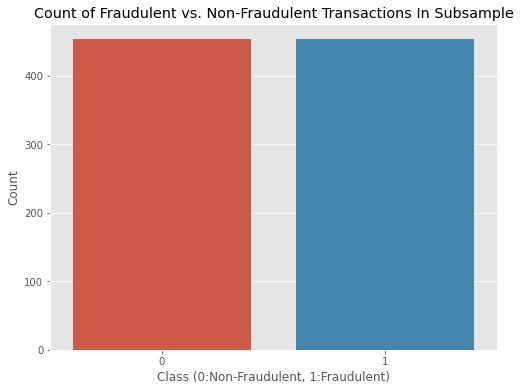

In [68]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [69]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -0.437
V2             0.486
V3            -0.562
V4             0.717
V5            -0.365
V6            -0.383
V7            -0.478
V8             0.058
V9            -0.554
V10           -0.625
V11            0.676
V12           -0.678
V13           -0.072
V14           -0.743
V15           -0.103
V16           -0.587
V17           -0.552
V18           -0.479
V19            0.262
V20            0.198
V21            0.129
V22           -0.004
V23           -0.005
V24           -0.091
V25            0.057
V26            0.111
V27            0.105
V28            0.107
Class          1.000
scaled_amount  0.059
scaled_time   -0.152

In [70]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

Class
V3  -0.562
V9  -0.554
V10 -0.625
V12 -0.678
V14 -0.743
V16 -0.587
V17 -0.552

In [71]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

Class
V4     0.717
V11    0.676
Class  1.000

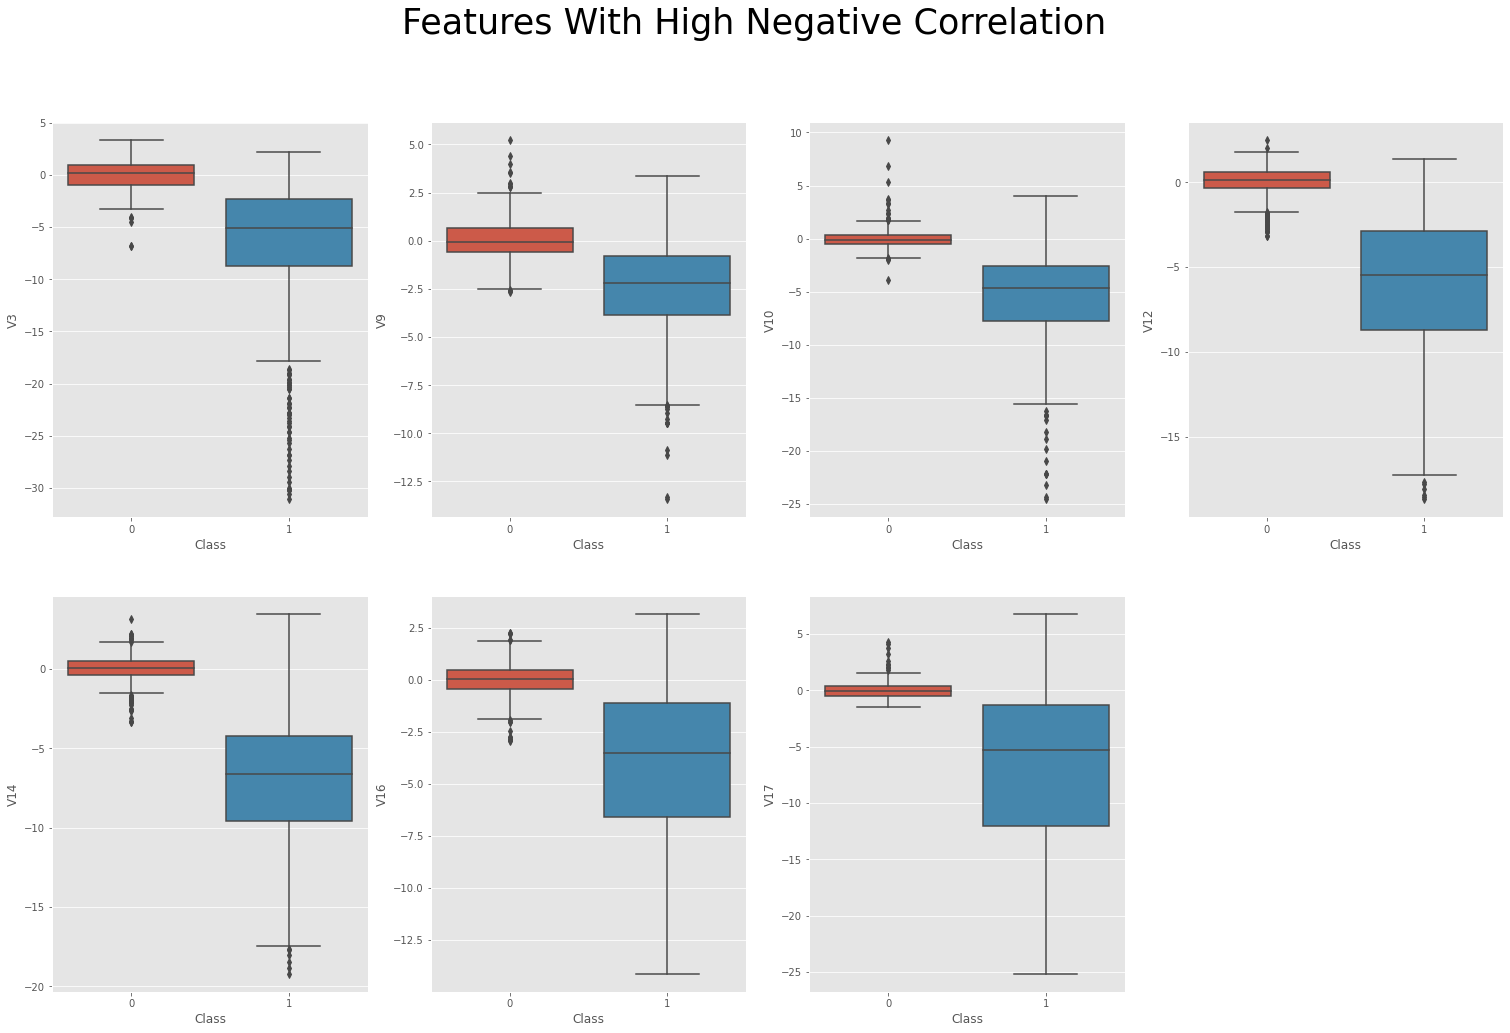

In [72]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

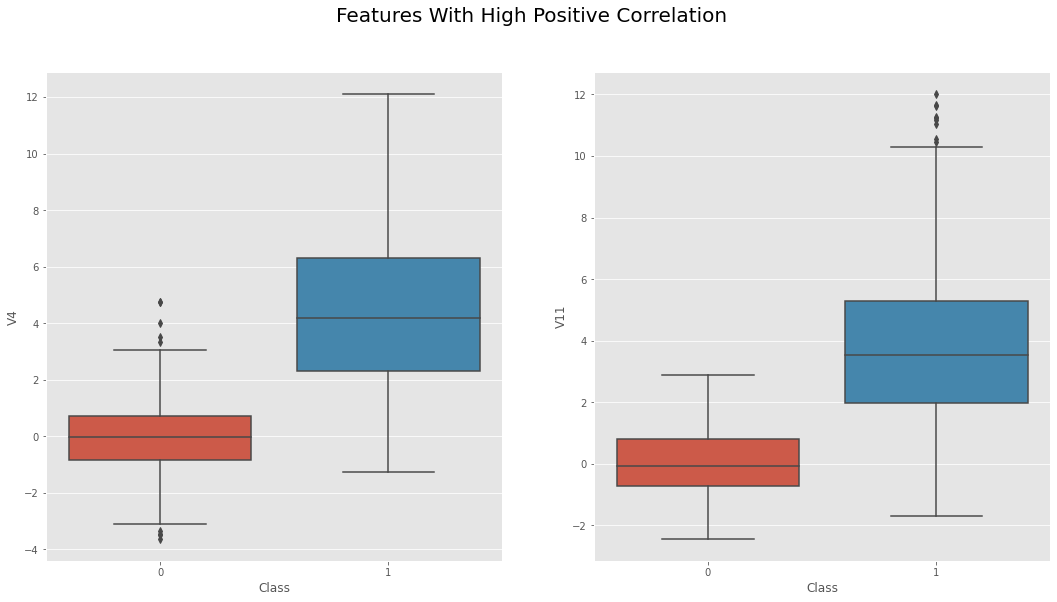

In [73]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [74]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [75]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 906 transactions by 267 transactions to 639 transactions.


**Dimensionality Reduction**

In [76]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [77]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

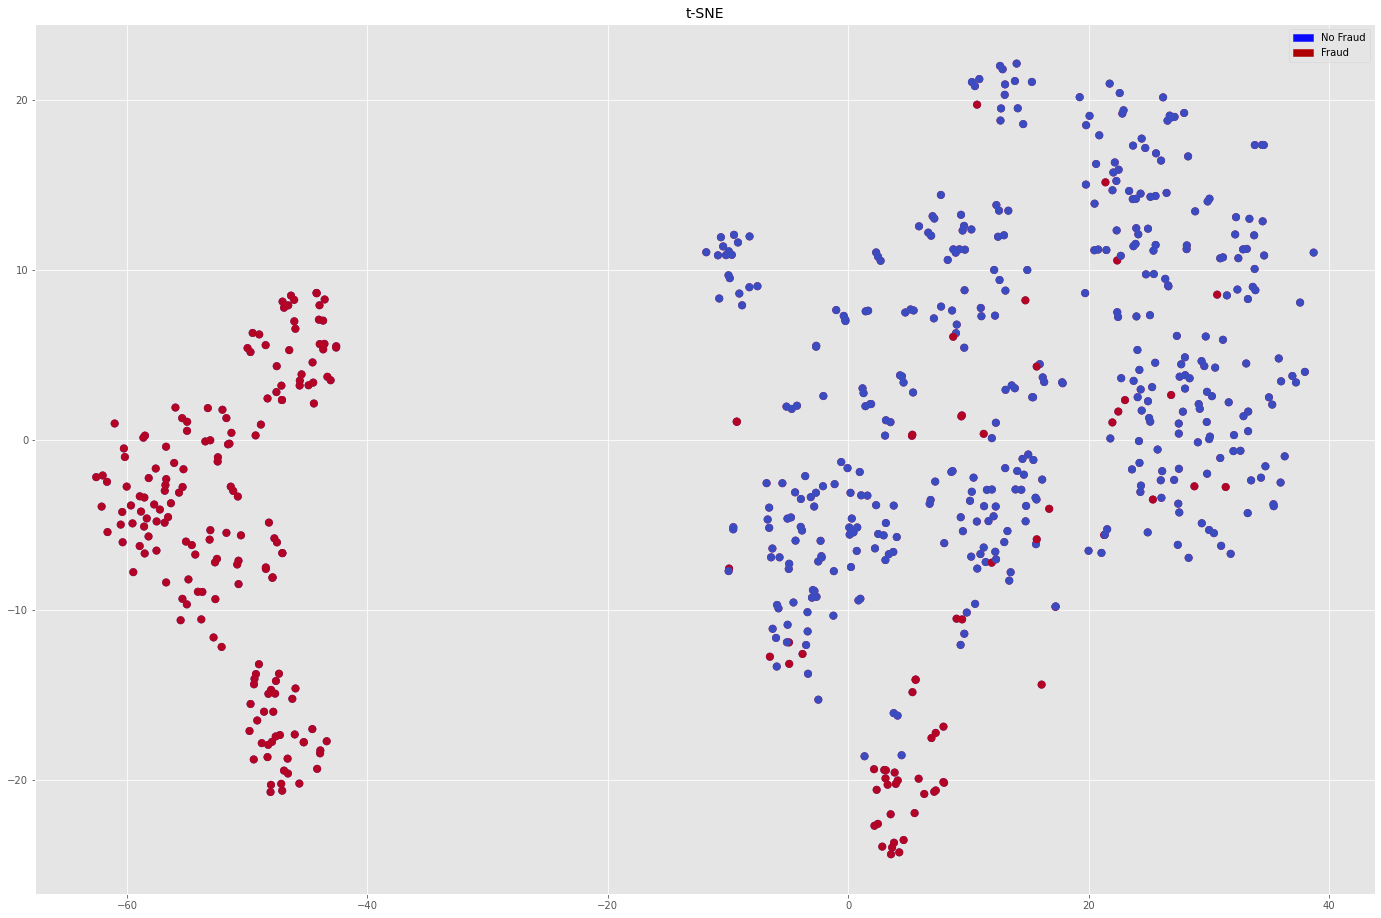

In [78]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


**Classification Algorithms**

In [79]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [80]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [82]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (511, 30) (128, 30) 

Y_shapes:
 Y_train: Y_validation:
 (511,) (128,)


In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [89]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.968661 (0.021711)
LDA: 0.970961 (0.020265)
KNN: 0.958002 (0.030951)
CART: 0.893074 (0.036747)
SVM: 0.965247 (0.030116)
[15:24:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

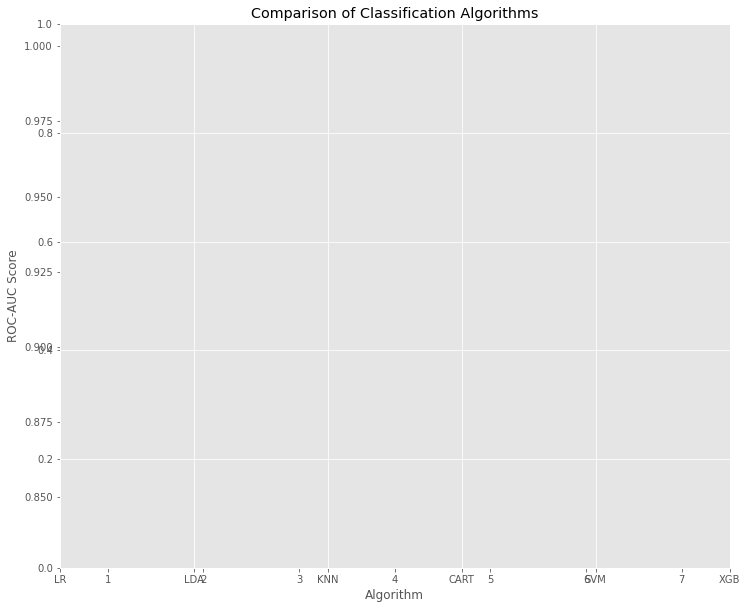

In [90]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [91]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')